In [40]:
import os
import pandas as pd
import warnings 
import numpy as np
from matplotlib import rc, rcParams
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore')
rc('font',family='AppleGothic')
rcParams['axes.unicode_minus']=False

In [41]:
path = '../data/'

train = pd.read_csv(path+'5_train.csv')
test = pd.read_csv(path+'5_test.csv')

train.shape, test.shape

((1437, 91), (518, 89))

In [42]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '공가수', '자격유형', '버스정류장',
       '단지내주차면수', 'ERROR1', '임대건물구분_lb', '상가', '아파트', '지역_lb', '강원도', '경기도',
       '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시',
       '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도', '공급유형_lb', '공공분양',
       '공공임대(10년)', '공공임대(50년)', '공공임대(5년)', '공공임대(분납)', '국민임대', '영구임대',
       '임대상가', '장기전세', '행복주택', '자격유형_lb', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'ERROR1_lb', '나머지', '분양상가',
       '분양아파트', '총세대수_lb', '총세대수_lb_A1', '총세대수_lb_B1', '총세대수_lb_C1',
       '총세대수_lb_D1', '총세대수_lb_E1', '전용면적_5', '전용면적_15', '전용면적_20', '전용면적_25',
       '전용면적_30', '전용면적_35', '전용면적_40', '전용면적_45', '전용면적_50', '전용면적_55',
       '전용면적_60', '전용면적_65', '전용면적_70', '전용면적_75', '전용면적_80', '전용면적_100',
       '지역_cat', '등록차량수', '전용면적별세대수', '면적_세대수_곱', '면적_세대수_곱_총합', '면적_세대수_비율',
       '전용면적_비례_차량수'],
      dtype='object')

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import cross_val_score

In [44]:
sel = ['단지내주차면수', '전용면적별세대수', '면적_세대수_비율', '면적_세대수_곱_총합']
X = train[sel]
y = train[['전용면적_비례_차량수']]

# 피처스케일링
scaler = MinMaxScaler() # MinMaxScaler StandardScaler 
X_nor = scaler.fit_transform(X)
X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_nor)  

# X_all = np.concatenate((X_poly, X_nor[:,6:]), axis=1)

# 모델 
lr = LinearRegression()
rf = RandomForestRegressor()
lasso = Lasso()
ridge = Ridge()

# 회귀는 교차검증
rf_scores = cross_val_score(rf, X_poly, y,scoring='neg_mean_absolute_error', cv=5)
lr_scores = cross_val_score(lr, X_poly, y,scoring='neg_mean_absolute_error', cv=5)
lasso_scores = cross_val_score(lasso, X_poly, y,scoring='neg_mean_absolute_error', cv=5)
ridge_scores = cross_val_score(ridge, X_poly, y,scoring='neg_mean_absolute_error', cv=5)


rf_score = np.abs(rf_scores.mean())
lr_score = np.abs(lr_scores.mean())
lasso_score = np.abs(lasso_scores.mean())
ridge_score = np.abs(ridge_scores.mean())


print("RandomForestRegressor : ", rf_score)
print("LinearRegression :", lr_score)
print("Lasso (alpha=defalt) : ", lasso_score)
print("Ridge (alpha=defalt) : ", ridge_score)


RandomForestRegressor :  38.50934934929644
LinearRegression : 39.23168482944034
Lasso (alpha=defalt) :  42.2018215302114
Ridge (alpha=defalt) :  41.507053807807516


In [45]:
sel = ['단지내주차면수', '전용면적별세대수', '면적_세대수_비율', '면적_세대수_곱_총합', 
      '상가','아파트']
X = train[sel]
y = train[['전용면적_비례_차량수']]

# 피처스케일링
scaler = MinMaxScaler() # MinMaxScaler StandardScaler 
X_nor = scaler.fit_transform(X)
tmp_X_nor = X_nor[:,:4]
X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(tmp_X_nor)  

X_all = np.concatenate((X_poly, X_nor[:,4:]), axis=1)

# 모델 
lr = LinearRegression()
rf = RandomForestRegressor()
lasso = Lasso()
ridge = Ridge()

# 회귀는 교차검증
rf_scores = cross_val_score(rf, X_all, y,scoring='neg_mean_absolute_error', cv=5)
lr_scores = cross_val_score(lr, X_all, y,scoring='neg_mean_absolute_error', cv=5)
lasso_scores = cross_val_score(lasso, X_all, y,scoring='neg_mean_absolute_error', cv=5)
ridge_scores = cross_val_score(ridge, X_all, y,scoring='neg_mean_absolute_error', cv=5)


rf_score = np.abs(rf_scores.mean())
lr_score = np.abs(lr_scores.mean())
lasso_score = np.abs(lasso_scores.mean())
ridge_score = np.abs(ridge_scores.mean())


print("RandomForestRegressor : ", rf_score)
print("LinearRegression :", lr_score)
print("Lasso (alpha=defalt) : ", lasso_score)
print("Ridge (alpha=defalt) : ", ridge_score)


RandomForestRegressor :  38.42299545205641
LinearRegression : 39.04197667137092
Lasso (alpha=defalt) :  42.20213487950447
Ridge (alpha=defalt) :  41.31244823363296


In [23]:
sel = ['단지내주차면수', '전용면적별세대수', '면적_세대수_비율', '면적_세대수_곱_총합', 
      '상가','아파트',
      '공공분양']
X = train[sel]
y = train[['전용면적_비례_차량수']]

# 피처스케일링
scaler = MinMaxScaler() # MinMaxScaler StandardScaler 
X_nor = scaler.fit_transform(X)
tmp_X_nor = X_nor[:,:4]
X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(tmp_X_nor)  

X_all = np.concatenate((X_poly, X_nor[:,4:]), axis=1)

# 모델 
lr = LinearRegression()
rf = RandomForestRegressor()
lasso = Lasso()
ridge = Ridge()

# 회귀는 교차검증
rf_scores = cross_val_score(rf, X_all, y,scoring='neg_mean_absolute_error', cv=5)
lr_scores = cross_val_score(lr, X_all, y,scoring='neg_mean_absolute_error', cv=5)
lasso_scores = cross_val_score(lasso, X_all, y,scoring='neg_mean_absolute_error', cv=5)
ridge_scores = cross_val_score(ridge, X_all, y,scoring='neg_mean_absolute_error', cv=5)


rf_score = np.abs(rf_scores.mean())
lr_score = np.abs(lr_scores.mean())
lasso_score = np.abs(lasso_scores.mean())
ridge_score = np.abs(ridge_scores.mean())


print("RandomForestRegressor : ", rf_score)
print("LinearRegression :", lr_score)
print("Lasso (alpha=defalt) : ", lasso_score)
print("Ridge (alpha=defalt) : ", ridge_score)


RandomForestRegressor :  38.32662095070479
LinearRegression : 38.893508699604425
Lasso (alpha=defalt) :  42.20213487950447
Ridge (alpha=defalt) :  41.2534070621646


In [34]:
train['총세대수_lb'].shape

(1437,)

In [37]:
# train['총세대수_lb'].unique()

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
lbs = encoder.fit_transform(train['총세대수_lb'])
train['총세대수lb'] = lbs
train['총세대수lb'].dtype

dtype('int64')

In [38]:
sel = ['단지내주차면수', '전용면적별세대수', '면적_세대수_비율', '면적_세대수_곱_총합', 
      '상가','아파트',
      '공공분양','총세대수lb']

X = train[sel]
y = train[['전용면적_비례_차량수']]

# 피처스케일링
scaler = MinMaxScaler() # MinMaxScaler StandardScaler 
X_nor = scaler.fit_transform(X)
tmp_X_nor = X_nor[:,:4]
X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(tmp_X_nor)  

X_all = np.concatenate((X_poly, X_nor[:,4:]), axis=1)

# 모델 
lr = LinearRegression()
rf = RandomForestRegressor()
lasso = Lasso()
ridge = Ridge()

# 회귀는 교차검증
rf_scores = cross_val_score(rf, X_all, y,scoring='neg_mean_absolute_error', cv=5)
lr_scores = cross_val_score(lr, X_all, y,scoring='neg_mean_absolute_error', cv=5)
lasso_scores = cross_val_score(lasso, X_all, y,scoring='neg_mean_absolute_error', cv=5)
ridge_scores = cross_val_score(ridge, X_all, y,scoring='neg_mean_absolute_error', cv=5)


rf_score = np.abs(rf_scores.mean())
lr_score = np.abs(lr_scores.mean())
lasso_score = np.abs(lasso_scores.mean())
ridge_score = np.abs(ridge_scores.mean())


print("RandomForestRegressor : ", rf_score)
print("LinearRegression :", lr_score)
print("Lasso (alpha=defalt) : ", lasso_score)
print("Ridge (alpha=defalt) : ", ridge_score)


RandomForestRegressor :  38.44793215328566
LinearRegression : 39.01854796859032
Lasso (alpha=defalt) :  42.20190381817118
Ridge (alpha=defalt) :  41.385639428783925


In [39]:
sel = ['단지내주차면수', '전용면적별세대수', '면적_세대수_비율', '면적_세대수_곱_총합', 
      '상가','아파트',
      '공공분양', '총세대수_lb_A1', '총세대수_lb_B1', '총세대수_lb_C1',
       '총세대수_lb_D1', '총세대수_lb_E1']

X = train[sel]
y = train[['전용면적_비례_차량수']]

# 피처스케일링
scaler = MinMaxScaler() # MinMaxScaler StandardScaler 
X_nor = scaler.fit_transform(X)
tmp_X_nor = X_nor[:,:4]
X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(tmp_X_nor)  

X_all = np.concatenate((X_poly, X_nor[:,4:]), axis=1)

# 모델 
lr = LinearRegression()
rf = RandomForestRegressor()
lasso = Lasso()
ridge = Ridge()

# 회귀는 교차검증
rf_scores = cross_val_score(rf, X_all, y,scoring='neg_mean_absolute_error', cv=5)
lr_scores = cross_val_score(lr, X_all, y,scoring='neg_mean_absolute_error', cv=5)
lasso_scores = cross_val_score(lasso, X_all, y,scoring='neg_mean_absolute_error', cv=5)
ridge_scores = cross_val_score(ridge, X_all, y,scoring='neg_mean_absolute_error', cv=5)


rf_score = np.abs(rf_scores.mean())
lr_score = np.abs(lr_scores.mean())
lasso_score = np.abs(lasso_scores.mean())
ridge_score = np.abs(ridge_scores.mean())


print("RandomForestRegressor : ", rf_score)
print("LinearRegression :", lr_score)
print("Lasso (alpha=defalt) : ", lasso_score)
print("Ridge (alpha=defalt) : ", ridge_score)


RandomForestRegressor :  38.393839834869894
LinearRegression : 5010119289.548132
Lasso (alpha=defalt) :  42.142698275384475
Ridge (alpha=defalt) :  41.90796763749767


array([[<AxesSubplot:title={'center':'전용면적_비례_차량수'}>]], dtype=object)

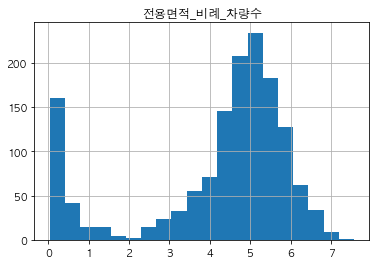

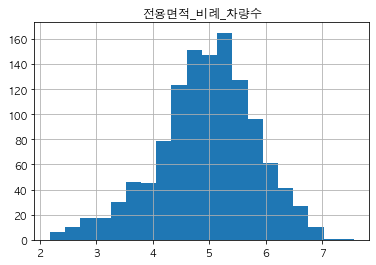

In [84]:
np.log1p(y).hist(bins=20)
bool_cond = ~(np.log1p(y)<2)
bool_list = bool_cond.values
gauss_y = np.log1p(y[bool_list])
gauss_y.hist(bins=20)

In [90]:
gauss_idx = train[bool_list].index
train[bool_list]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,공가수,자격유형,버스정류장,단지내주차면수,...,전용면적_75,전용면적_80,전용면적_100,지역_cat,등록차량수,전용면적별세대수,면적_세대수_곱,면적_세대수_곱_총합,면적_세대수_비율,전용면적_비례_차량수
0,C1000,566,아파트,충청북도,국민임대,39,10.0,A,1.0,438.0,...,0,0,0,mid,481.0,419,16341,23478,0.696013,334.782392
1,C1000,566,아파트,충청북도,국민임대,46,10.0,A,1.0,438.0,...,0,0,0,mid,481.0,72,3312,23478,0.141068,67.853821
2,C1000,566,아파트,충청북도,국민임대,51,10.0,A,1.0,438.0,...,0,0,0,mid,481.0,75,3825,23478,0.162918,78.363787
15,C1004,521,아파트,충청남도,영구임대,39,3.0,C,2.0,153.0,...,0,0,0,low,93.0,504,19656,20315,0.967561,89.983165
16,C1005,1144,아파트,충청남도,국민임대,51,16.0,A,8.0,950.0,...,0,0,0,low,376.0,904,46104,60264,0.765034,287.652728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,N2085,1339,아파트,서울특별시,장기전세,59,9.0,A,3.0,1590.0,...,0,0,0,mid,1595.0,142,8378,86222,0.097168,154.982603
1433,N2431,1047,아파트,경상남도,공공임대(10년),74,15.0,A,2.0,1066.0,...,0,0,0,mid,1214.0,80,5920,66492,0.089033,108.086386
1434,N2431,1047,아파트,경상남도,공공임대(10년),84,15.0,A,2.0,1066.0,...,0,1,0,mid,1214.0,495,41580,66492,0.625338,759.160801
1435,N2431,1047,아파트,경상남도,국민임대,36,16.0,A,2.0,1066.0,...,0,0,0,mid,1214.0,272,9792,66492,0.147266,178.780726


In [95]:
X_all_df = pd.DataFrame(X_all)
X_all_df[bool_list]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.238095,0.221868,0.695942,0.245068,0.056689,0.052826,0.165701,0.058349,0.049226,0.154408,0.054373,0.484336,0.170553,0.060058,0.0,1.0
1,0.238095,0.037686,0.140868,0.245068,0.056689,0.008973,0.033540,0.058349,0.001420,0.005309,0.009236,0.019844,0.034522,0.060058,0.0,1.0
2,0.238095,0.039278,0.162723,0.245068,0.056689,0.009352,0.038744,0.058349,0.001543,0.006391,0.009626,0.026479,0.039878,0.060058,0.0,1.0
15,0.078431,0.266985,0.967553,0.211043,0.006151,0.020940,0.075887,0.016552,0.071281,0.258322,0.056345,0.936159,0.204196,0.044539,0.0,1.0
16,0.524930,0.479299,0.764979,0.640778,0.275551,0.251599,0.401560,0.336364,0.229728,0.366654,0.307124,0.585193,0.490182,0.410596,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,0.883473,0.074841,0.096957,0.920010,0.780525,0.066120,0.085659,0.812805,0.005601,0.007256,0.068854,0.009401,0.089201,0.846419,0.0,1.0
1433,0.589916,0.041932,0.088821,0.707773,0.348001,0.024736,0.052397,0.417527,0.001758,0.003724,0.029678,0.007889,0.062865,0.500943,0.0,1.0
1434,0.589916,0.262208,0.625251,0.707773,0.348001,0.154681,0.368846,0.417527,0.068753,0.163946,0.185584,0.390939,0.442536,0.500943,0.0,1.0
1435,0.589916,0.143843,0.147067,0.707773,0.348001,0.084855,0.086757,0.417527,0.020691,0.021155,0.101808,0.021629,0.104090,0.500943,0.0,1.0


In [97]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '공가수', '자격유형', '버스정류장',
       '단지내주차면수', 'ERROR1', '임대건물구분_lb', '상가', '아파트', '지역_lb', '강원도', '경기도',
       '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시',
       '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도', '공급유형_lb', '공공분양',
       '공공임대(10년)', '공공임대(50년)', '공공임대(5년)', '공공임대(분납)', '국민임대', '영구임대',
       '임대상가', '장기전세', '행복주택', '자격유형_lb', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'ERROR1_lb', '나머지', '분양상가',
       '분양아파트', '총세대수_lb', '총세대수_lb_A1', '총세대수_lb_B1', '총세대수_lb_C1',
       '총세대수_lb_D1', '총세대수_lb_E1', '전용면적_5', '전용면적_15', '전용면적_20', '전용면적_25',
       '전용면적_30', '전용면적_35', '전용면적_40', '전용면적_45', '전용면적_50', '전용면적_55',
       '전용면적_60', '전용면적_65', '전용면적_70', '전용면적_75', '전용면적_80', '전용면적_100',
       '지역_cat', '등록차량수', '전용면적별세대수', '면적_세대수_곱', '면적_세대수_곱_총합', '면적_세대수_비율',
       '전용면적_비례_차량수'],
      dtype='object')

<AxesSubplot:>

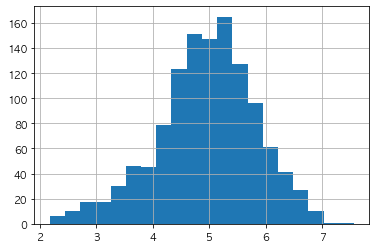

In [112]:
# print(X_all_df.shape)
# print(gauss_y.shape)

# y = train['전용면적_비례_차량수']
# np.log1p(y).hist()
# new_y = y[np.log1p(y)>2]
# new_X = pd.DataFrame(X_all)[np.log1p(y)>2]

# print(new_y.shape)
# print(new_X.shape)

new_y.hist(bins=20)

In [111]:
sel = ['단지내주차면수','전용면적별세대수', '면적_세대수_곱_총합','면적_세대수_비율',
      '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도',
      '나머지', '분양상가', '분양아파트'] # '임대료', '면적_세대수_곱' 

X = train[sel]
y = train['전용면적_비례_차량수']

# 피처스케일링
scaler = MinMaxScaler()# MinMaxScaler StandardScaler
X_nor = scaler.fit_transform(X)
tmp_X_nor = X_nor[:,:4]
X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(tmp_X_nor)  

X_all = np.concatenate((X_poly, X_nor[:,4:]), axis=1)

# log1p(y) 이상치처리
new_y = np.log1p(y[np.log1p(y)>2])
new_X = pd.DataFrame(X_all)[np.log1p(y)>2]

print(new_y.shape)
print(new_X.shape)

# 모델 
rf = RandomForestRegressor()
lr = LinearRegression()

# 회귀는 교차검증
rf_scores = cross_val_score(rf, new_X, new_y ,scoring='neg_mean_absolute_error', cv=5)
lr_scores = cross_val_score(lr, new_X, new_y ,scoring='neg_mean_absolute_error', cv=5)

rf_score = np.abs(rf_scores.mean())
lr_score = np.abs(lr_scores.mean())
print("RandomForestRegressor : ", rf_score)
print("LinearRegression : ", lr_score)


(1200,)
(1200, 33)
RandomForestRegressor :  0.23618082186909822
LinearRegression :  0.3110285415715076


In [130]:

rf = RandomForestRegressor()
rf.fit(new_X, new_y)
pred = rf.predict(new_X)

print(pred.shape, new_y.shape)
df_array = np.array([new_y, pred])
# y_i = np.exp1m(new_y)
# y_pred = np.exp1m(pred)
print(df_array.shape)
df = pd.DataFrame(df_array.T, columns=["new_y", "pred"])
df['expm1(new_y)'] = np.exp(df['new_y'])-1
df['expm1(pred)'] = np.exp(df['pred'])-1

df['abs'] = np.abs(df['expm1(new_y)']-df['expm1(pred)'])
print(df['abs'].sum()/df['abs'].shape[0])


(1200,) (1200,)
(2, 1200)
15.198138254941359


In [131]:
print(new_X.shape)

(1200, 33)


In [132]:
X_test = test[sel]

X_test_nor = scaler.transform(X_test)
tmp_X_test_nor = X_test_nor[:,:4]
X_test_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(tmp_X_test_nor)
X_test_all = np.concatenate((X_test_poly, X_test_nor[:,4:]), axis=1)

rf = RandomForestRegressor()
rf.fit(new_X, new_y)
pred = rf.predict(X_test_all)
print(X_test_all.shape)

(518, 33)


In [136]:
test['전용면적_비례_차량수(log)'] = pred
test['전용면적_비례_차량수'] = np.expm1(test['전용면적_비례_차량수(log)'])
test

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,공가수,자격유형,버스정류장,단지내주차면수,...,전용면적_75,전용면적_80,전용면적_100,지역_cat,전용면적별세대수,면적_세대수_곱,면적_세대수_곱_총합,면적_세대수_비율,전용면적_비례_차량수(log),전용면적_비례_차량수
0,C1003,480,아파트,경상남도,행복주택,16,29.0,J,3.0,339.0,...,0,0,0,mid,128,2048,12492,0.163945,3.879977,47.423107
1,C1003,480,아파트,경상남도,행복주택,26,29.0,J,3.0,339.0,...,0,0,0,mid,250,6500,12492,0.520333,4.781840,118.323747
2,C1003,480,아파트,경상남도,행복주택,36,29.0,J,3.0,339.0,...,0,0,0,mid,68,2448,12492,0.195965,3.936844,50.256578
3,C1003,480,아파트,경상남도,행복주택,44,29.0,J,3.0,339.0,...,0,0,0,mid,34,1496,12492,0.119757,3.691710,39.113398
4,C1006,1505,상가,대전광역시,임대상가,37,27.0,D,5.0,428.0,...,0,0,0,mid,7,259,41674,0.006215,2.348364,9.468426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,C2688,150,아파트,전라남도,국민임대,33,1.0,H,3.0,107.0,...,0,0,0,mid,56,1848,4552,0.405975,3.955939,51.244704
514,C2688,150,아파트,전라남도,국민임대,46,1.0,H,3.0,107.0,...,0,0,0,mid,16,736,4552,0.161687,2.998035,19.046114
515,C2688,150,아파트,전라남도,영구임대,24,1.0,C,3.0,107.0,...,0,0,0,mid,30,720,4552,0.158172,3.004123,19.168525
516,C2691,765,아파트,경기도,공공임대(10년),74,25.0,A,19.0,910.0,...,0,0,0,mid,175,12950,62510,0.207167,5.334528,206.374761


In [137]:
final = test.groupby("단지코드", as_index=False).agg({'전용면적_비례_차량수': 'sum'})
final.columns = ['code', 'num']
final

,code,num
0,C1003,255.116830
1,C1006,419.180905
2,C1016,617.149514
3,C1019,256.406306
4,C1030,40.592029
...,...,...
142,C2646,590.430765
143,C2653,955.631214
144,C2676,469.007601
145,C2688,122.120774


In [138]:
err = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
err_df = pd.DataFrame(err)

final = pd.concat([final, err_df])
final.reset_index(drop=True, inplace=True)
final

,code,num
0,C1003,255.117
1,C1006,419.181
2,C1016,617.15
3,C1019,256.406
4,C1030,40.592
...,...,...
145,C2688,122.121
146,C2691,1055.39
147,C2675,0
148,C2335,0


In [139]:
PATH = './sub/'

final.to_csv(PATH + "0730_2st_sub.csv", index=False)
os.listdir(PATH)

['0730_2st_sub.csv', '0727_1st_sub.csv']